**This notebook is an exercise in the [Machine Learning Explainability](https://www.kaggle.com/learn/machine-learning-explainability) course.  You can reference the tutorial at [this link](https://www.kaggle.com/dansbecker/permutation-importance).**

---


## Intro

You will think about and calculate permutation importance with a sample of data from the [Taxi Fare Prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction) competition.

We won't focus on data exploration or model building for now. You can just run the cell below to 
- Load the data
- Divide the data into training and validation
- Build a model that predicts taxi fares
- Print a few rows for you to review

In [1]:
# Loading data, dividing, modeling and EDA below
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('../input/new-york-city-taxi-fare-prediction/train.csv', nrows=50000)

# Remove data with extreme outlier coordinates or negative fares
data = data.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0'
                  )

y = data.fare_amount

base_features = ['pickup_longitude',
                 'pickup_latitude',
                 'dropoff_longitude',
                 'dropoff_latitude',
                 'passenger_count']

X = data[base_features]


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
first_model = RandomForestRegressor(n_estimators=50, random_state=1).fit(train_X, train_y)

# Environment Set-Up for feedback system.
from learntools.core import binder
binder.bind(globals())
from learntools.ml_explainability.ex2 import *
print("Setup Complete")

# show data
print("Data sample:")
data.head()

Setup Complete
Data sample:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1


The following two cells may also be useful to understand the values in the training data:

In [2]:
train_X.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,23466.000000,23466.000000,23466.000000,23466.000000,23466.000000
mean,-73.976827,40.756931,-73.975359,40.757434,1.662320
std,0.014625,0.018206,0.015930,0.018659,1.290729
min,-73.999999,40.700013,-73.999999,40.700020,0.000000
25%,-73.987964,40.744901,-73.987143,40.745756,1.000000
50%,-73.979629,40.758076,-73.978588,40.758542,1.000000
75%,-73.967797,40.769602,-73.966459,40.770406,2.000000
max,-73.900062,40.799952,-73.900062,40.799999,6.000000


In [3]:
train_y.describe()

count    23466.000000
mean         8.472539
std          4.609747
min          0.010000
25%          5.500000
50%          7.500000
75%         10.100000
max        165.000000
Name: fare_amount, dtype: float64

Mean **tip** is about 8.5 $

## Question 1

The first model uses the following features
- pickup_longitude
- pickup_latitude
- dropoff_longitude
- dropoff_latitude
- passenger_count

Before running any code... which variables seem potentially useful for predicting taxi fares? Do you think permutation importance will necessarily identify these features as important?

Once you've thought about it, run `q_1.solution()` below to see how you might think about this before running the code.

In [4]:
# Check your answer (Run this code cell to receive credit!)
q_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> It would be helpful to know whether New York City taxis
    vary prices based on how many passengers they have. Most places do not
    change fares based on numbers of passengers.
    If you assume New York City is the same, then only the top 4 features listed should matter. At first glance, it seems all of those should matter equally.
    

## Question 2

Create a `PermutationImportance` object called `perm` to show the importances from `first_model`.  Fit it with the appropriate data and show the weights.

For your convenience, the code from the tutorial has been copied into a comment in this code cell.

In [5]:
import eli5
from eli5.sklearn import PermutationImportance

# Make a small change to the code below to use in this problem. 
# perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
perm = PermutationImportance(first_model, random_state=1).fit(val_X, val_y)

# Check your answer
q_2.check()

# uncomment the following line to visualize your results
eli5.show_weights(perm, feature_names=base_features)

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Nice job!:</span> Note that these scores can vary slightly from one run to the next.
                      But the big picture findings will stay the same each time.
                      

Weight,Feature
0.8426 ± 0.0168,dropoff_latitude
0.8269 ± 0.0211,pickup_latitude
0.5943 ± 0.0436,pickup_longitude
0.5387 ± 0.0273,dropoff_longitude
-0.0020 ± 0.0013,passenger_count


Uncomment the lines below for a hint or to see the solution.

In [6]:
q_2.hint()
q_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> The only thing you need to change is the first argument to `PermutationImportance()`. Find the right model name in the code above

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(first_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = base_features)

```

## Question 3
Before seeing these results, we might have expected each of the 4 directional features to be equally important.

But, on average, the latitude features matter more than the longititude features. Can you come up with any hypotheses for this?

After you've thought about it, check here for some possible explanations:

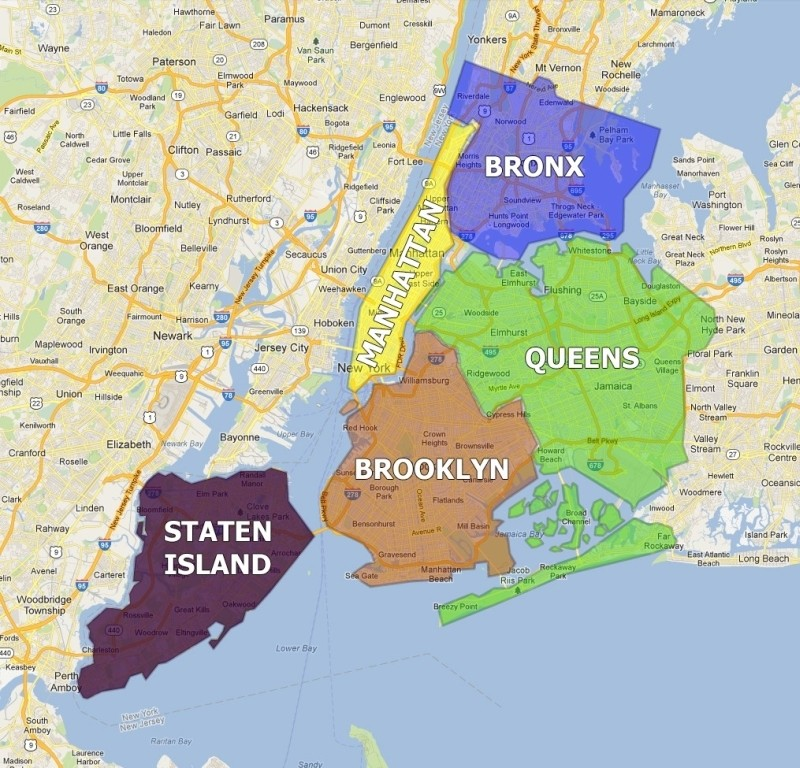
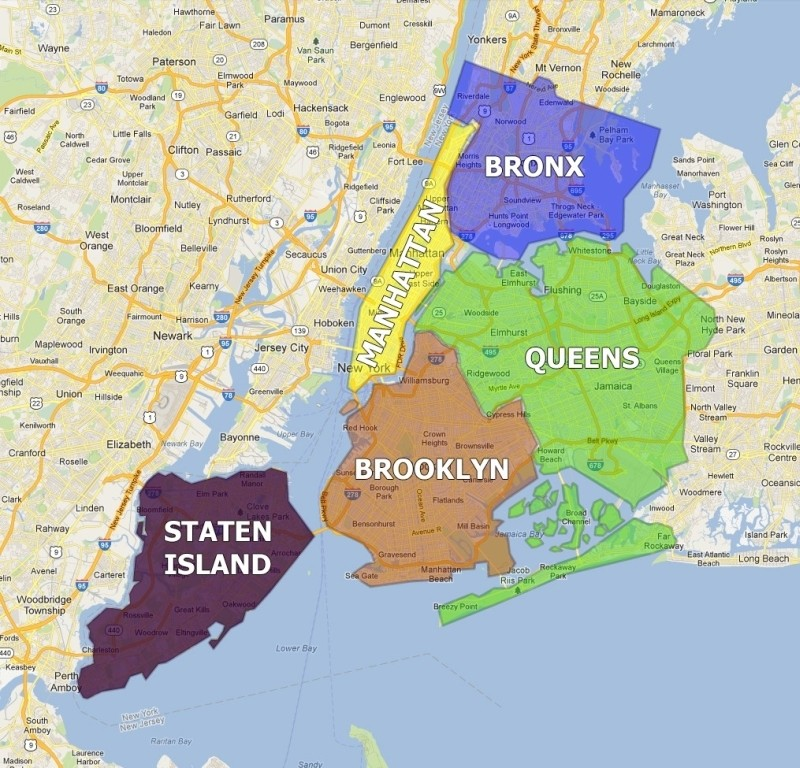

In [7]:
# Check your answer (Run this code cell to receive credit!)
q_3.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
    1. Travel might tend to have greater latitude distances than longitude distances. If the longitudes values were generally closer together, shuffling them wouldn't matter as much.
    2. Different parts of the city might have different pricing rules (e.g. price per mile), and pricing rules could vary more by latitude than longitude.
    3. Tolls might be greater on roads going North<->South (changing latitude) than on roads going East <-> West (changing longitude).  Thus latitude would have a larger effect on the prediction because it captures the amount of the tolls.
    

## Question 4

Without detailed knowledge of New York City, it's difficult to rule out most hypotheses about why latitude features matter more than longitude.

A good next step is to disentangle the effect of being in certain parts of the city from the effect of total distance traveled.  

The code below creates new features for longitudinal and latitudinal distance. It then builds a model that adds these new features to those you already had.

Fill in two lines of code to calculate and show the importance weights with this new set of features. As usual, you can uncomment lines below to check your code, see a hint or get the solution.

In [8]:
# create new features
data['abs_lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)
data['abs_lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)

features_2  = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'abs_lat_change',
               'abs_lon_change']

X = data[features_2]
new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(X, y, random_state=1)
second_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(new_train_X, new_train_y)

# Create a PermutationImportance object on second_model and fit it to new_val_X and new_val_y
# Use a random_state of 1 for reproducible results that match the expected solution.
perm2 = PermutationImportance(second_model, random_state=1).fit(new_val_X, new_val_y)

# show the weights for the permutation importance you just calculated
eli5.show_weights(perm2, feature_names=features_2)

Weight,Feature
0.5979 ± 0.0625,abs_lat_change
0.4485 ± 0.0503,abs_lon_change
0.0810 ± 0.0240,pickup_latitude
0.0766 ± 0.0121,dropoff_latitude
0.0709 ± 0.0103,pickup_longitude
0.0596 ± 0.0135,dropoff_longitude


In [9]:
# Check your answer
q_4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

How would you interpret these importance scores? Distance traveled seems far more important than any location effects. 

But the location still affects model predictions, and dropoff location now matters slightly more than pickup location. Do you have any hypotheses for why this might be? The techniques in the next lessons will help you` dive into this more.

In [10]:
# Check your answer (Run this code cell to receive credit!)
q_4.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

data['abs_lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)
data['abs_lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)

features_2  = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'abs_lat_change',
               'abs_lon_change']

X = data[features_2]
new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(X, y, random_state=1)
second_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(new_train_X, new_train_y)

# Create a PermutationImportance object on second_model and fit it to new_val_X and new_val_y
perm2 = PermutationImportance(second_model, random_state=1).fit(new_val_X, new_val_y)

# show the weights for the permutation importance you just calculated
eli5.show_weights(perm2, feature_names = features_2)

```

### Now PI is called in sckit-learn
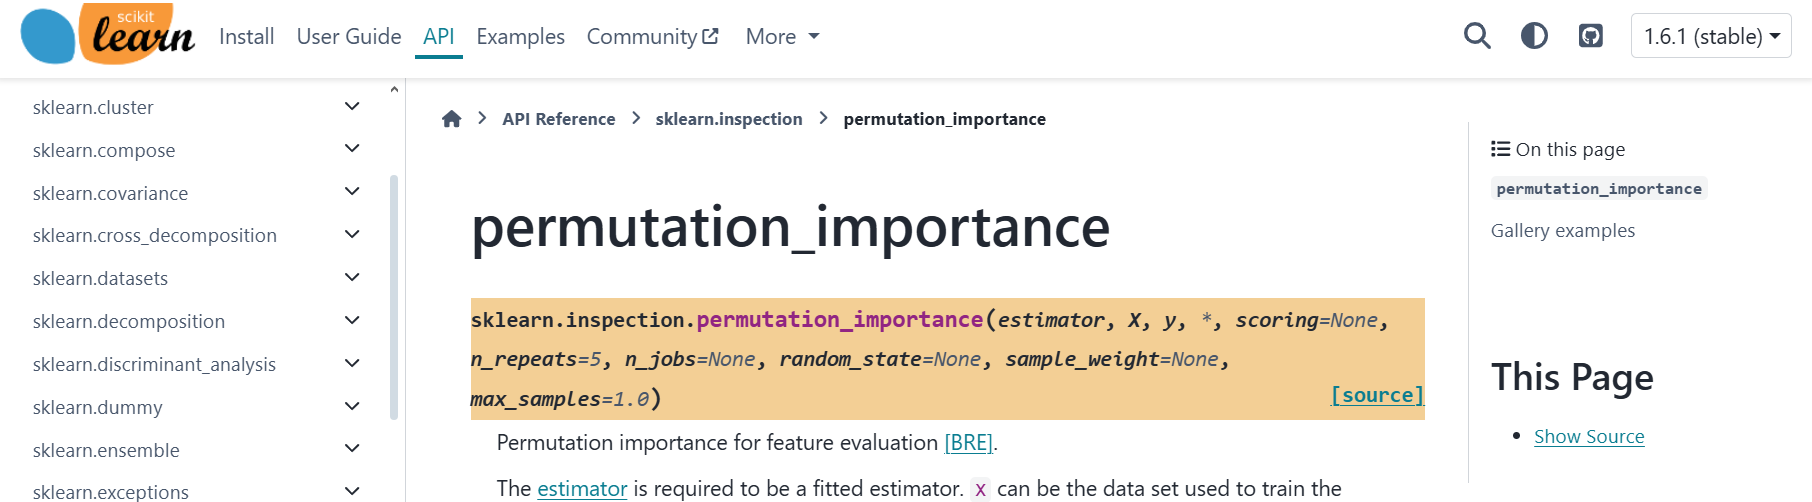

## Question 5

A colleague observes that the values for `abs_lon_change` and `abs_lat_change` are pretty small (all values are between -0.1 and 0.1), whereas other variables have larger values.  Do you think this could explain why those coordinates had larger permutation importance values in this case?  

Consider an alternative where you created and used a feature that was 100X as large for these features, and used that larger feature for training and importance calculations. Would this change the outputted permutaiton importance values?

Why or why not?

After you have thought about your answer, either try this experiment or look up the answer in the cell below.

In [11]:
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,abs_lat_change,abs_lon_change
2,-73.982738,40.761270,-73.991242,40.750562,0.010708,0.008504
3,-73.987130,40.733143,-73.991567,40.758092,0.024949,0.004437
4,-73.968095,40.768008,-73.956655,40.783762,0.015754,0.011440
6,-73.980002,40.751662,-73.973802,40.764842,0.013180,0.006200
7,-73.951300,40.774138,-73.990095,40.751048,0.023090,0.038795


In [12]:
X.loc[:, 'abs_lat_change'] *= 100
X.loc[:, 'abs_lon_change'] *= 100

In [13]:
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,abs_lat_change,abs_lon_change
2,-73.982738,40.761270,-73.991242,40.750562,1.0708,0.8504
3,-73.987130,40.733143,-73.991567,40.758092,2.4949,0.4437
4,-73.968095,40.768008,-73.956655,40.783762,1.5754,1.1440
6,-73.980002,40.751662,-73.973802,40.764842,1.3180,0.6200
7,-73.951300,40.774138,-73.990095,40.751048,2.3090,3.8795


In [14]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=28)
third_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(train_X, train_y)

# Create a PermutationImportance object on second_model and fit it to new_val_X and new_val_y
# Use a random_state of 1 for reproducible results that match the expected solution.
perm3 = PermutationImportance(third_model, random_state=1).fit(val_X, val_y)

# show the weights for the permutation importance you just calculated
eli5.show_weights(perm3, feature_names=features_2)

Weight,Feature
0.5090 ± 0.0200,abs_lat_change
0.4554 ± 0.0099,abs_lon_change
0.0723 ± 0.0176,dropoff_latitude
0.0623 ± 0.0174,pickup_latitude
0.0554 ± 0.0109,dropoff_longitude
0.0310 ± 0.0106,pickup_longitude


In [15]:
# Check your answer (Run this code cell to receive credit!)
q_5.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
    The scale of features does not affect permutation importance per se. The only reason that rescaling a feature would affect PI is indirectly, if rescaling helped or hurt the ability of the particular learning method we're using to make use of that feature.
    That won't happen with tree based models, like the Random Forest used here.
    If you are familiar with Ridge Regression, you might be able to think of how that would be affected.
    That said, the absolute change features are have high importance because they capture total distance traveled, which is the primary determinant of taxi fares...It is not an artifact of the feature magnitude.
    

## Question 6

You've seen that the feature importance for latitudinal distance is greater than the importance of longitudinal distance. From this, can we conclude whether travelling a fixed latitudinal distance tends to be more expensive than traveling the same longitudinal distance?

Why or why not? Check your answer below.

In [16]:
# Check your answer (Run this code cell to receive credit!)
q_6.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
    We cannot tell from the permutation importance results whether traveling a fixed latitudinal distance is more or less expensive than traveling the same longitudinal distance.
    Possible reasons latitude feature are more important than longitude features
    1. latitudinal distances in the dataset tend to be larger
    2. it is more expensive to travel a fixed latitudinal distance
    3. Both of the above
    If abs_lon_change values were very small, longitues could be less important to the model even if the cost per mile of travel in that direction were high.
    

## Keep Going

Permutation importance is useful useful for debugging, understanding your model, and communicating a high-level overview from your model.  

Next, learn about **[partial dependence plots](https://www.kaggle.com/dansbecker/partial-plots)** to see **how** each feature affects predictions.


---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/machine-learning-explainability/discussion) to chat with other learners.*